<a href="https://colab.research.google.com/github/enidroman/Enid-Roman-Project-1/blob/main/Enid_Roman_Python_201_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **2014 - 2015 to 2016 -2017 NYC Regents Report**





In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv')
df.head()


,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,...,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s,...,s,s,s,s,s,na,na
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,...,6.3,15,93.8,7,43.8,na,na
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,...,11.1,8,88.9,2,22.2,na,na
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s,...,s,s,s,s,s,na,na
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s,...,s,s,s,s,s,na,na


I observed the missing values "s" and "na" in the dataset. I then replaced the missing values with NaN to make it easier to replace all the missing value into a meaningful 
value. 

In [ ]:
missing_values =["s", "na"]

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv', 
                 na_values=missing_values)
df.head()

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,...,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,...,6.3,15.0,93.8,7.0,43.8,NaN,NaN
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74.0,...,11.1,8.0,88.9,2.0,22.2,NaN,NaN
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


I dropped the last 2 columns, "Number scoring CR' and "Percent Scoring CR". Didn't think it was necessary for my analysis.

In [ ]:
drop_cols=['Number Scoring CR', 'Percent Scoring CR']
df.drop(drop_cols, inplace = True, axis=1)
df.head()

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1.0,6.3,15.0,93.8,7.0,43.8
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74.0,1.0,11.1,8.0,88.9,2.0,22.2
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


I converted all "NaN" to median values in each column to make my analysis workable. 

In [ ]:
missing_values =["NaN"]
median = df['Mean Score'].median()
df['Mean Score'].fillna(median, inplace=True)
median = df['Number Scoring Below 65'].median()
df['Number Scoring Below 65'].fillna(median, inplace=True)
median = df['Percent Scoring Below 65'].median()
df['Percent Scoring Below 65'].fillna(median, inplace=True)
median = df['Number Scoring 65 or Above'].median()
df['Number Scoring 65 or Above'].fillna(median, inplace=True)
median = df['Percent Scoring 65 or Above'].median()
df['Percent Scoring 65 or Above'].fillna(median, inplace=True)
median = df['Number Scoring 80 or Above'].median()
df['Number Scoring 80 or Above'].fillna(median, inplace=True)
median = df['Percent Scoring 80 or Above'].median()
df['Percent Scoring 80 or Above'].fillna(median, inplace=True)
df.head(50)

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,65.4,13.0,40.2,21.0,59.8,5.0,12.5
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1.0,6.3,15.0,93.8,7.0,43.8
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74.0,1.0,11.1,8.0,88.9,2.0,22.2
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,65.4,13.0,40.2,21.0,59.8,5.0,12.5
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,65.4,13.0,40.2,21.0,59.8,5.0,12.5
5,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2015,9,67.4,3.0,33.3,6.0,66.7,0.0,0.0
6,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2016,15,72.6,2.0,13.3,13.0,86.7,5.0,33.3
7,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2017,9,64.4,5.0,55.6,4.0,44.4,1.0,11.1
8,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2015,49,78.4,1.0,2.0,48.0,98.0,23.0,46.9
9,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2016,51,79.0,9.0,17.6,42.0,82.4,33.0,64.7


I did an analysis of each city wide school's average test scores by year, type of exam and the number of students tested. 


In [ ]:
df.groupby(['School DBN', 'Year','Regents Exam', 'Total Tested'])['Number Scoring 80 or Above'].mean()


School DBN  Year  Regents Exam        Total Tested
01M034      2015  Living Environment  1               5.0
                                      3               5.0
                                      5               5.0
                                      6               3.0
                                      7               3.0
                                                     ... 
84X717      2017  Living Environment  4               5.0
                                      6               5.0
                                      8               5.0
                                      9               5.0
                                      10              5.0
Name: Number Scoring 80 or Above, Length: 181924, dtype: float64

I did a graphing of each city wide school's average test scores by year, type of exam and the number of students tested

(array([-25000.,      0.,  25000.,  50000.,  75000., 100000., 125000.,
        150000., 175000., 200000.]),
 <a list of 10 Text major ticklabel objects>)

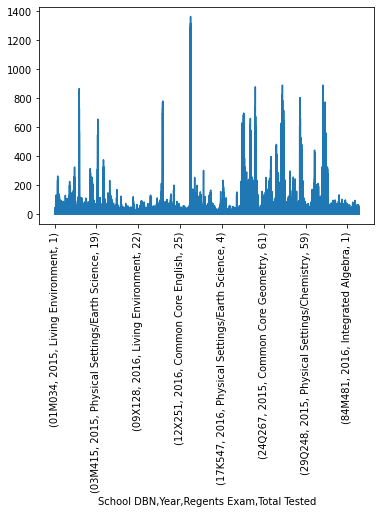

In [ ]:
df.groupby(['School DBN', 'Year','Regents Exam', 'Total Tested'])['Number Scoring 80 or Above'].mean().plot()
plt.xticks(rotation=90)

### **Analysis on Kingsborough Early College School**

I pull up the school I wanted to further analyze, Kingsborough Early College School.

In [ ]:
brooklyn_school = df[df['School DBN'] == '21K468']
brooklyn_school.head()


,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above
12577,21K468,Kingsborough Early College School,Secondary School,Algebra2/Trigonometry,2015,97,57.8,56.0,57.7,41.0,42.3,17.0,17.5
12578,21K468,Kingsborough Early College School,Secondary School,Algebra2/Trigonometry,2016,67,56.3,43.0,64.2,24.0,35.8,9.0,13.4
12579,21K468,Kingsborough Early College School,Secondary School,Algebra2/Trigonometry,2017,10,70.8,2.0,20.0,8.0,80.0,2.0,20.0
12580,21K468,Kingsborough Early College School,Secondary School,Common Core Algebra,2015,97,68.7,22.0,22.7,75.0,77.3,7.0,7.2
12581,21K468,Kingsborough Early College School,Secondary School,Common Core Algebra,2016,133,72.1,27.0,20.3,106.0,79.7,37.0,27.8


I did a count on how many rows this particular data from the school I chose have. 

In [ ]:
brooklyn_school.count()

School DBN                     398
School Name                    398
School Level                   398
Regents Exam                   398
Year                           398
Total Tested                   398
Mean Score                     398
Number Scoring Below 65        398
Percent Scoring Below 65       398
Number Scoring 65 or Above     398
Percent Scoring 65 or Above    398
Number Scoring 80 or Above     398
Percent Scoring 80 or Above    398
dtype: int64

I did a max() function which gave me the item with the highest value from this particular school. In this case data ends with U.S History and Government. Information is upto year 2017. The highest overall total student tested is 133. The highest overall average score is 88.4. The highest overall number scored below 65 is 67. The highest overall percentile scored below 65 is 100. The highest overall number scored 65 and above is 108. The highest overall percentile scored 65 and above is 100. The highest overall number Scoring 80 or above is 75. The highest overall percentile scored 80 or above is 92.9.

In [ ]:
brooklyn_school.max()

School DBN                                                21K468
School Name                    Kingsborough Early College School
School Level                                    Secondary School
Regents Exam                         U.S. History and Government
Year                                                        2017
Total Tested                                                 133
Mean Score                                                  88.4
Number Scoring Below 65                                       67
Percent Scoring Below 65                                     100
Number Scoring 65 or Above                                   108
Percent Scoring 65 or Above                                  100
Number Scoring 80 or Above                                    75
Percent Scoring 80 or Above                                 92.9
dtype: object

I did a min() function which gave me the item with the lowest value of this particular school. In this case data begins with Algebra2/Trigonometry. Information begins in year 2015. Total least # tested is 1 and the lowest average is 38. All other information was 0.

In [ ]:
brooklyn_school.min()

School DBN                                                21K468
School Name                    Kingsborough Early College School
School Level                                    Secondary School
Regents Exam                               Algebra2/Trigonometry
Year                                                        2015
Total Tested                                                   1
Mean Score                                                    38
Number Scoring Below 65                                        0
Percent Scoring Below 65                                       0
Number Scoring 65 or Above                                     0
Percent Scoring 65 or Above                                    0
Number Scoring 80 or Above                                     0
Percent Scoring 80 or Above                                    0
dtype: object

I did a mean() function to get the average in total tested, mean score, number scoring below 65, percentile scoring below 65, number scoring 65 or above, percetile 65 or above, number scoring 80 or above and, percentile scoring 80 or above. 

I did notice the Year 2015.929648 since it is numbers it calculated into as an average.

In [ ]:
brooklyn_school.mean()

Year                           2015.929648
Total Tested                     31.118090
Mean Score                       69.076382
Number Scoring Below 65          11.477387
Percent Scoring Below 65         31.769347
Number Scoring 65 or Above       28.017588
Percent Scoring 65 or Above      68.231407
Number Scoring 80 or Above       10.989950
Percent Scoring 80 or Above      23.898492
dtype: float64

I did a median() function to get the middle value of total tested, mean score, number scoring below 65, percentile scoring below 65, number scoring 65 or above, percentile scoring 65 or above, number scoring 80 or above, and percentile scoring 80 or above. 
I did notice the Year 2016.00 since it is numbers it calculated into as an average.

In [ ]:
brooklyn_school.median()

Year                           2016.00
Total Tested                     22.00
Mean Score                       67.60
Number Scoring Below 65          12.00
Percent Scoring Below 65         34.20
Number Scoring 65 or Above       21.00
Percent Scoring 65 or Above      65.80
Number Scoring 80 or Above        5.00
Percent Scoring 80 or Above      14.15
dtype: float64

I did a describe() function of this particular school to compute a summary of satistics pertaining to the DataFrame columns. This function gives the mean, std and IQR values. 
Again I notice the Year calculated into as an average.

In [ ]:
brooklyn_school.describe()

,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,2015.929648,31.118090,69.076382,11.477387,31.769347,28.017588,68.231407,10.989950,23.898492
std,0.799922,28.354603,7.639141,9.435890,18.871172,19.925862,18.870191,13.536773,20.406701
min,2015.000000,1.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,7.000000,65.400000,5.000000,16.700000,18.000000,59.800000,5.000000,12.500000
50%,2016.000000,22.000000,67.600000,12.000000,34.200000,21.000000,65.800000,5.000000,14.150000
75%,2017.000000,47.750000,74.500000,13.000000,40.200000,34.000000,83.300000,13.000000,35.275000
max,2017.000000,133.000000,88.400000,67.000000,100.000000,108.000000,100.000000,75.000000,92.900000


I pulled up the complete data for this particular school for further observation by putting the maximum rows and columns it contains. 

In [ ]:
pd.set_option('display.max_rows',399)
pd.set_option('display.max_columns',14)
brooklyn_school

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above
12577,21K468,Kingsborough Early College School,Secondary School,Algebra2/Trigonometry,2015,97,57.8,56.0,57.7,41.0,42.3,17.0,17.5
12578,21K468,Kingsborough Early College School,Secondary School,Algebra2/Trigonometry,2016,67,56.3,43.0,64.2,24.0,35.8,9.0,13.4
12579,21K468,Kingsborough Early College School,Secondary School,Algebra2/Trigonometry,2017,10,70.8,2.0,20.0,8.0,80.0,2.0,20.0
12580,21K468,Kingsborough Early College School,Secondary School,Common Core Algebra,2015,97,68.7,22.0,22.7,75.0,77.3,7.0,7.2
12581,21K468,Kingsborough Early College School,Secondary School,Common Core Algebra,2016,133,72.1,27.0,20.3,106.0,79.7,37.0,27.8
12582,21K468,Kingsborough Early College School,Secondary School,Common Core Algebra,2017,128,73.9,20.0,15.6,108.0,84.4,35.0,27.3
12583,21K468,Kingsborough Early College School,Secondary School,Common Core Algebra2,2016,64,57.0,43.0,67.2,21.0,32.8,0.0,0.0
12584,21K468,Kingsborough Early College School,Secondary School,Common Core Algebra2,2017,78,66.6,26.0,33.3,52.0,66.7,5.0,6.4
12585,21K468,Kingsborough Early College School,Secondary School,Common Core English,2015,83,80.7,6.0,7.2,77.0,92.8,53.0,63.9
12586,21K468,Kingsborough Early College School,Secondary School,Common Core English,2016,104,84.8,4.0,3.8,100.0,96.2,75.0,72.1


I did a displot graphing of "mean score" for this particular school. Which it looks like the highest average score with all the exams is apporximitaly 65 or 67.

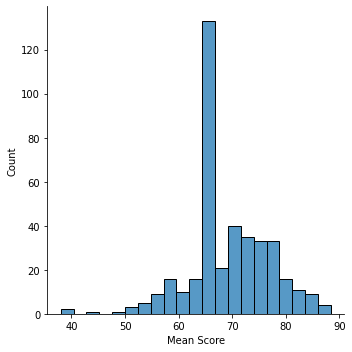

In [ ]:
sns.displot(brooklyn_school['Mean Score']) 

I did a jointplot graph just to compare the mean score with each regent exam. 

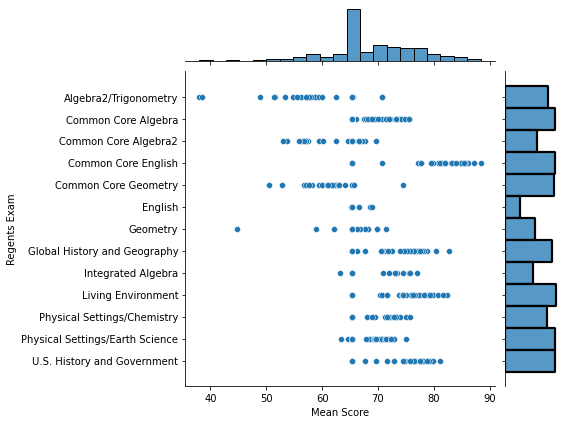

In [ ]:
sns.jointplot(x='Mean Score', y='Regents Exam', data = brooklyn_school)

I did a sns.pairplot graphing. It gives a comparison between each variable for an instant examination of the data. You can see in the Y and X axis has the same lined of variables. 

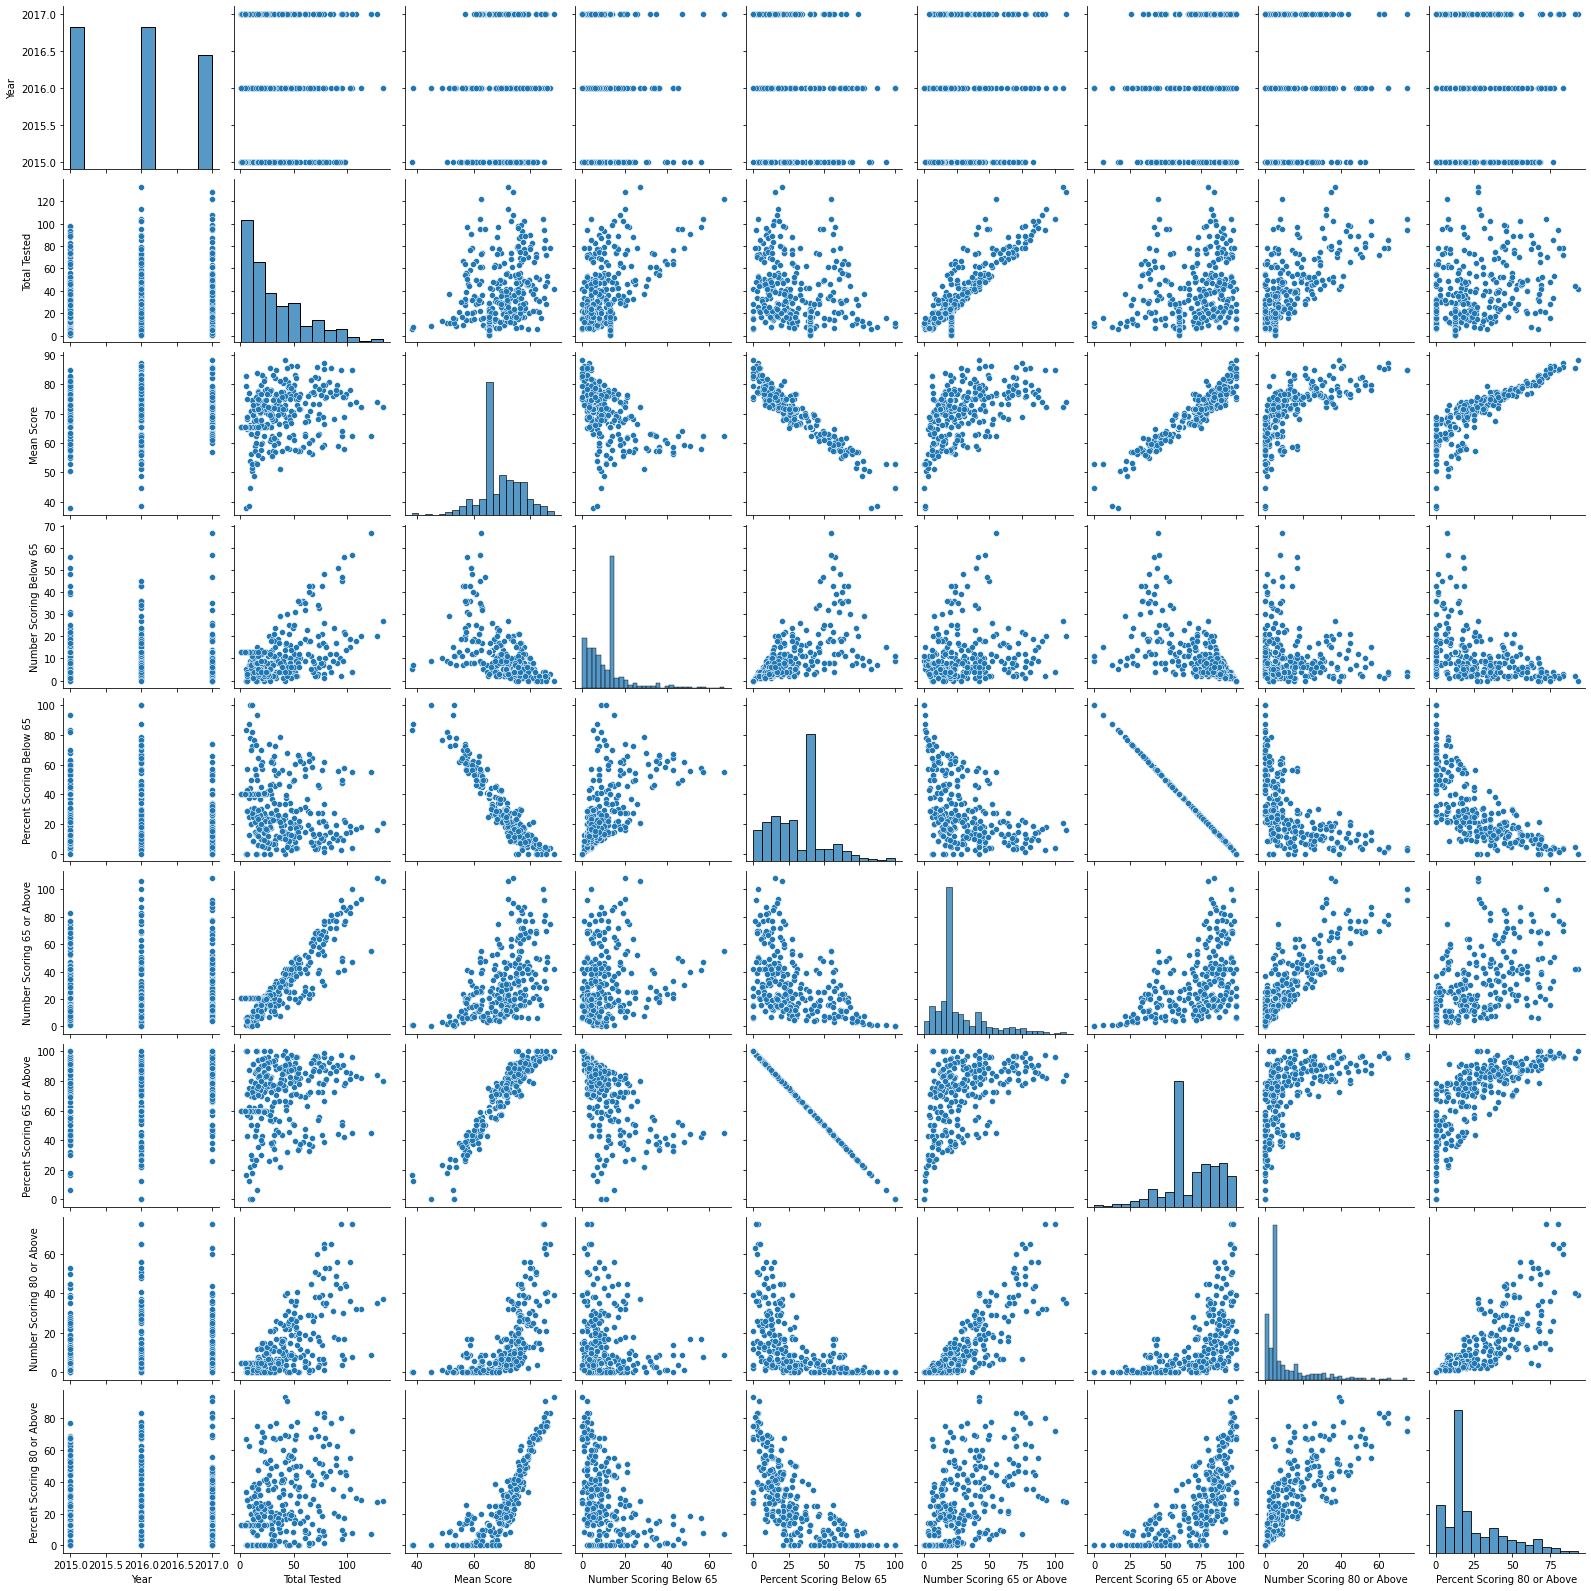

In [ ]:
sns.pairplot(brooklyn_school)

I did a sns.pairplot graphing by adding "Regents Exam" as a hue. It gives a comparison between each variable for each Regents Exam. You can see in the Y and X axis has the same lined of variables. The colors shows the different Regents Exam differntiated in different colors that is listed on the right side. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


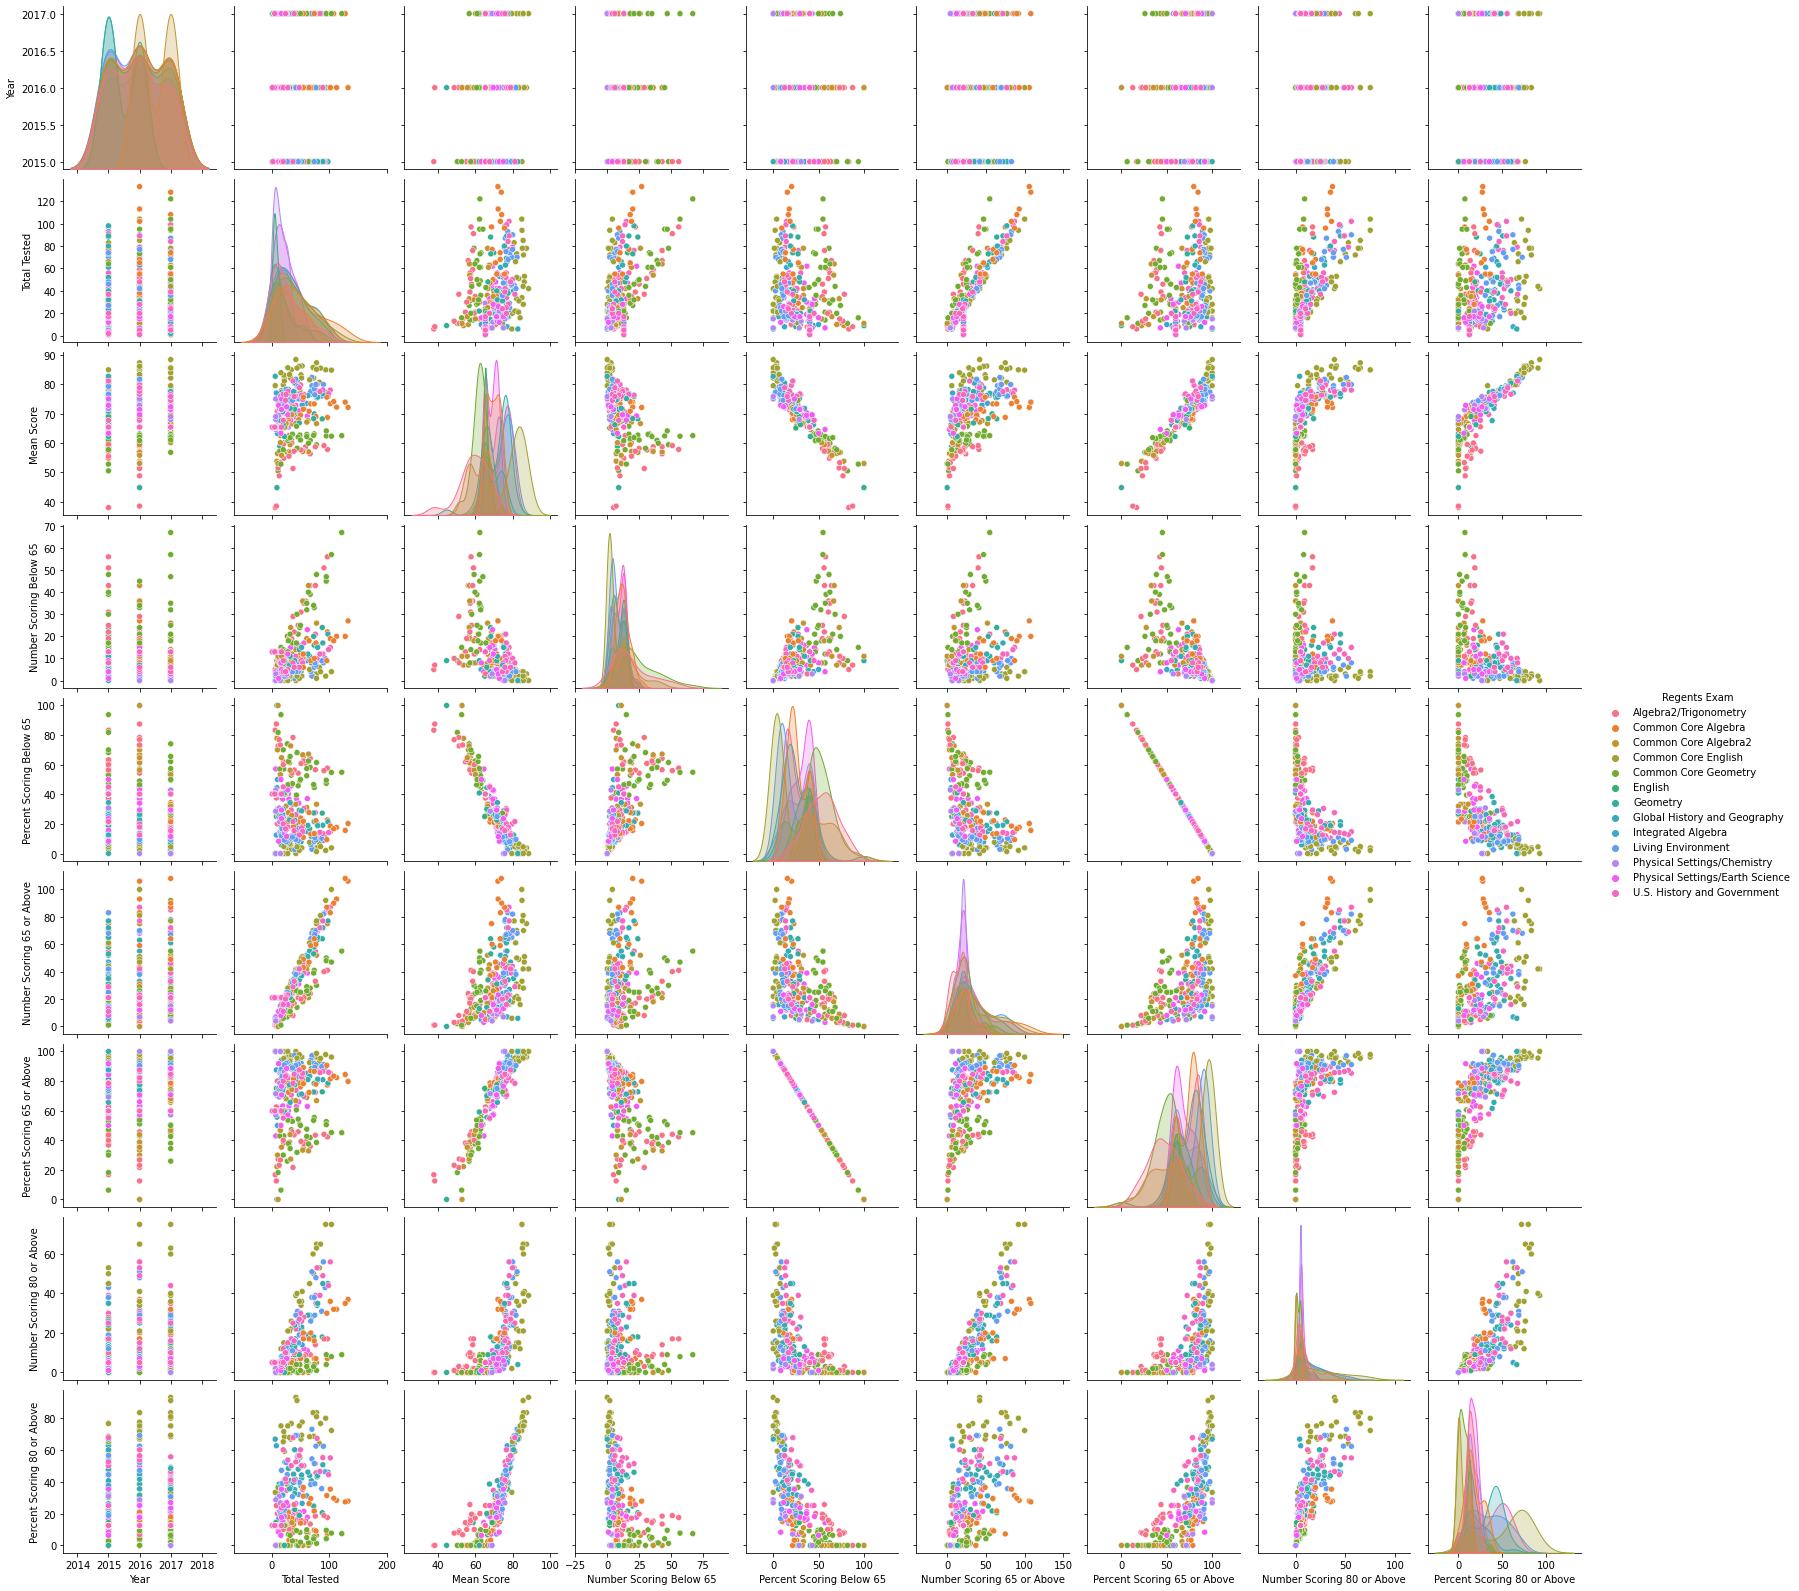

In [ ]:
sns.pairplot(brooklyn_school,hue='Regents Exam')

I did a sns.boxplot showing a comparison with the average regents scores for each regents. Common Core English has the highest average of 85 and the lowest is Algebra 2/Trigonometry with 55.



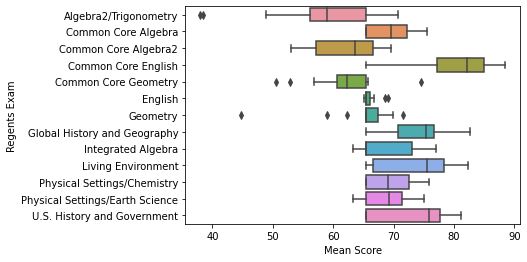

In [ ]:
sns.boxplot(x='Mean Score', y='Regents Exam', data=brooklyn_school)

I did a sns.barplot. Again, showing a comparison with the average regents scores for each regents. Common Core English has the highest average of 85 and the lowest is Algebra 2/Trigonometry with 55.

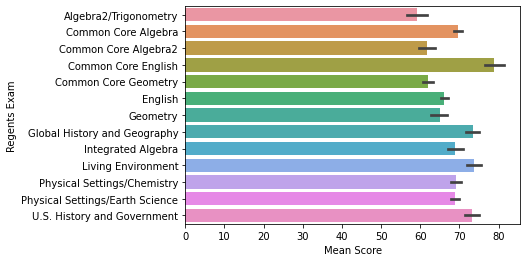

In [ ]:
sns.barplot(x='Mean Score', y='Regents Exam', data=brooklyn_school)

I did a graph using the hist() function which just give me a measurment of each variables from the columns.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1ae58a1f50>,
      dtype=object)

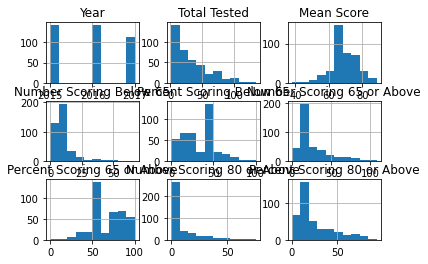

In [ ]:
brooklyn_school.hist()


I did a groupby function. This gives me from the total students tested how many of them had the score of 80 and above for each regent for each particular year. 

In [ ]:
brooklyn_school.groupby(['Regents Exam', 'Year'])['Total Tested', 'Number Scoring 80 or Above'].max()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Total Tested  Number Scoring 80 or Above
Regents Exam                    Year                                          
Algebra2/Trigonometry           2015            97                        17.0
                                2016            67                         9.0
                                2017            10                         5.0
Common Core Algebra             2015            97                         7.0
                                2016           133                        37.0
                                2017           128                        35.0
Common Core Algebra2            2016            64                         5.0
                                2017            78                         5.0
Common Core English             2015            83                        53.0
                                2016           104                        75.0
                                2017            94                        75.0
Common Core Geometry            2015            78                         5.0
                                2016            95                         5.0
                                2017           122                         9.0
English                         2015            15                         5.0
Geometry                        2015            88                        18.0
                                2016             9                         5.0
Global History and Geography    2015            98                        45.0
                                2016            79                        34.0
                                2017            69                        28.0
Integrated Algebra              2015            61                        19.0
                                2016             5                         5.0
Living Environment              2015            93                        43.0
                                2016            90                        56.0
                                2017            87                        31.0
Physical Settings/Chemistry     2015            26                         6.0
                                2016            34                         7.0
                                2017            29                         5.0
Physical Settings/Earth Science 2015            49                         9.0
                                2016            62                        11.0
                                2017            56                        12.0
U.S. History and Government     2015            76                        39.0
                                2016           102                        56.0
                                2017            99                        44.0

I did a groupby function. This gives me from the total students tested how many of them had the score of below 65 for each regent for each particular year.

In [ ]:
brooklyn_school.groupby(['Regents Exam', 'Year'])['Total Tested', 'Number Scoring Below 65'].max()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Total Tested  Number Scoring Below 65
Regents Exam                    Year                                       
Algebra2/Trigonometry           2015            97                     56.0
                                2016            67                     43.0
                                2017            10                     13.0
Common Core Algebra             2015            97                     22.0
                                2016           133                     27.0
                                2017           128                     20.0
Common Core Algebra2            2016            64                     43.0
                                2017            78                     26.0
Common Core English             2015            83                     13.0
                                2016           104                     13.0
                                2017            94                     13.0
Common Core Geometry            2015            78                     48.0
                                2016            95                     45.0
                                2017           122                     67.0
English                         2015            15                     13.0
Geometry                        2015            88                     24.0
                                2016             9                     13.0
Global History and Geography    2015            98                     21.0
                                2016            79                     16.0
                                2017            69                     13.0
Integrated Algebra              2015            61                     13.0
                                2016             5                     13.0
Living Environment              2015            93                     13.0
                                2016            90                     13.0
                                2017            87                     13.0
Physical Settings/Chemistry     2015            26                     13.0
                                2016            34                     13.0
                                2017            29                     13.0
Physical Settings/Earth Science 2015            49                     14.0
                                2016            62                     23.0
                                2017            56                     13.0
U.S. History and Government     2015            76                     21.0
                                2016           102                     15.0
                                2017            99                     14.0

I did a groupby function with describe. Which gives a compution a summary of satistics pertaining to total tested for each regent for each year. This function gives the mean, std and IQR values.

In [ ]:
brooklyn_school.groupby(['Regents Exam', 'Year'])['Total Tested'].describe()

count       mean        std  min    25%  \
Regents Exam                    Year                                            
Algebra2/Trigonometry           2015   11.0  44.090909  31.876181  6.0  20.50   
                                2016   12.0  27.916667  23.035381  1.0  10.25   
                                2017    9.0   5.555556   3.678013  1.0   4.00   
Common Core Algebra             2015   12.0  40.416667  29.730481  2.0  21.75   
                                2016   13.0  51.153846  43.231636  1.0  19.00   
                                2017   12.0  53.333333  40.486436  5.0  26.00   
Common Core Algebra2            2016   12.0  26.666667  21.697647  1.0   9.75   
                                2017   12.0  32.500000  24.777189  1.0  15.00   
Common Core English             2015   12.0  34.583333  27.287887  1.0  15.25   
                                2016   13.0  40.000000  33.481338  1.0  18.00   
                                2017   12.0  39.166667  29.978275  1.0  15.75   
Common Core Geometry            2015   12.0  32.500000  25.893137  2.0  13.25   
                                2016   12.0  39.583333  29.463254  1.0  21.00   
                                2017   12.0  50.833333  38.921444  1.0  24.50   
English                         2015   11.0   6.818182   4.377629  1.0   3.50   
Geometry                        2015   12.0  36.666667  28.990071  2.0  14.75   
                                2016   10.0   4.500000   2.718251  1.0   2.25   
Global History and Geography    2015   12.0  40.833333  33.258856  1.0  15.00   
                                2016   12.0  32.916667  25.209877  1.0  15.25   
                                2017   11.0  31.363636  20.140868  2.0  17.00   
Integrated Algebra              2015   12.0  25.416667  20.375825  1.0   9.50   
                                2016    9.0   2.777778   1.787301  1.0   1.00   
Living Environment              2015   13.0  35.769231  29.757783  1.0  16.00   
                                2016   13.0  34.615385  29.792444  1.0  12.00   
                                2017   12.0  36.250000  27.844128  5.0  16.50   
Physical Settings/Chemistry     2015   10.0  13.000000   8.793937  3.0   5.00   
                                2016   11.0  15.454545  13.002797  1.0   4.00   
                                2017   10.0  14.500000   9.823441  1.0   7.00   
Physical Settings/Earth Science 2015   13.0  18.846154  15.805306  1.0   7.00   
                                2016   12.0  25.833333  18.299694  1.0  14.75   
                                2017   12.0  23.333333  17.935913  1.0   7.75   
U.S. History and Government     2015   12.0  31.666667  22.083862  2.0  17.75   
                                2016   13.0  39.230769  34.095830  1.0  12.00   
                                2017   12.0  41.250000  31.334341  5.0  20.25   

                                       50%    75%    max  
Regents Exam                    Year                      
Algebra2/Trigonometry           2015  39.0  63.50   97.0  
                                2016  22.5  41.75   67.0  
                                2017   4.0  10.00   10.0  
Common Core Algebra             2015  34.0  56.00   97.0  
                                2016  38.0  68.00  133.0  
                                2017  44.5  79.50  128.0  
Common Core Algebra2            2016  24.0  38.25   64.0  
                                2017  30.0  46.75   78.0  
Common Core English             2015  27.5  53.25   83.0  
                                2016  31.0  53.00  104.0  
                                2017  35.0  57.00   94.0  
Common Core Geometry            2015  27.0  49.00   78.0  
                                2016  35.5  55.00   95.0  
                                2017  41.0  69.50  122.0  
English                         2015   7.0   9.50   15.0  
Geometry                        2015  31.0  54.25   88.0  
                                2016   4.0   6.50    9.0  


### **Comparison of of Number Scoring 80 or Above for each Regents Exam from the school I chose Kingsborough Early College School to all the citywide school together.**

I first did a analysis of the number scoring 80 or above for each regents exam from Kingsborough Early College School. Common Core English had the most number of schoring 80 or above for Kingsborough Early College School.

In [ ]:
brooklyn_school.groupby(['Regents Exam'])['Number Scoring 80 or Above'].max()

Regents Exam
Algebra2/Trigonometry              17.0
Common Core Algebra                37.0
Common Core Algebra2                5.0
Common Core English                75.0
Common Core Geometry                9.0
English                             5.0
Geometry                           18.0
Global History and Geography       45.0
Integrated Algebra                 19.0
Living Environment                 56.0
Physical Settings/Chemistry         7.0
Physical Settings/Earth Science    12.0
U.S. History and Government        56.0
Name: Number Scoring 80 or Above, dtype: float64

I did a graph plot of the number scoring 80 or above for each regents exam from Kingsborough Early College School. 

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 <a list of 9 Text major ticklabel objects>)

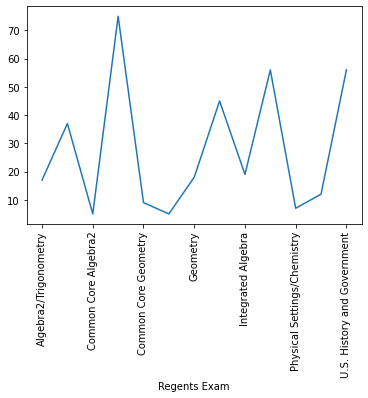

In [ ]:
brooklyn_school.groupby(['Regents Exam'])['Number Scoring 80 or Above'].max().plot()
plt.xticks(rotation=90)

I did a analysis of the number scoring 80 or above for each regents exam from all the city wide schools. Global History and Geography had the most number scoring 80 or above for all citywide. 

In [ ]:
df.groupby(['Regents Exam'])['Number Scoring 80 or Above'].max()

Regents Exam
Algebra2/Trigonometry               967.0
Common Core Algebra                 533.0
Common Core Algebra2               1005.0
Common Core English                1318.0
Common Core Geometry               1138.0
English                             774.0
Geometry                           1119.0
Global History and Geography       1365.0
Integrated Algebra                  238.0
Living Environment                  945.0
Physical Settings/Chemistry         978.0
Physical Settings/Earth Science     247.0
Physical Settings/Physics          1171.0
U.S. History and Government        1256.0
Name: Number Scoring 80 or Above, dtype: float64

I did a graph plot of the number scoring 80 or above for each regents exam for all the citywide schools.

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 <a list of 9 Text major ticklabel objects>)

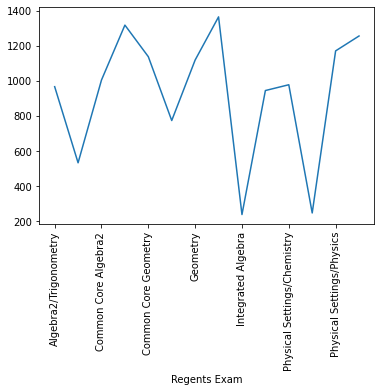

In [ ]:
df.groupby(['Regents Exam'])['Number Scoring 80 or Above'].max().plot()
plt.xticks(rotation=90)

### **Comparison of of Number Scoring Below 65 for each Regents Exam from the school I chose Kingsborough Early College School to all the citywide school together.**

I did an analysis of the number scoring below 65 for each regents exam from Kingsborough Early College School. Common Core Geometry had the most number of scoring below 65 at Kingsborough Early College School. 

In [ ]:
brooklyn_school.groupby(['Regents Exam'])['Number Scoring Below 65'].max()


Regents Exam
Algebra2/Trigonometry              56.0
Common Core Algebra                27.0
Common Core Algebra2               43.0
Common Core English                13.0
Common Core Geometry               67.0
English                            13.0
Geometry                           24.0
Global History and Geography       21.0
Integrated Algebra                 13.0
Living Environment                 13.0
Physical Settings/Chemistry        13.0
Physical Settings/Earth Science    23.0
U.S. History and Government        21.0
Name: Number Scoring Below 65, dtype: float64

I did an graph plot of the number scoring below 65 for each regents exam from Kingsborough Early College School.

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 <a list of 9 Text major ticklabel objects>)

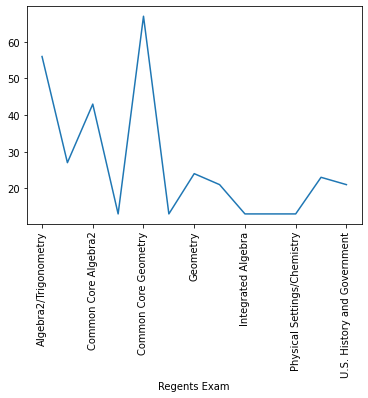

In [ ]:
brooklyn_school.groupby(['Regents Exam'])['Number Scoring Below 65'].max().plot()
plt.xticks(rotation=90)

I did an analysis of the number scoring below 65 for each regents exam from all the schools citywide. Common Core Algebra had the most number scoring below 65 for all citywide schools. 

In [ ]:
df.groupby(['Regents Exam'])['Number Scoring Below 65'].max()

Regents Exam
Algebra2/Trigonometry              420.0
Common Core Algebra                697.0
Common Core Algebra2               374.0
Common Core English                432.0
Common Core Geometry               647.0
English                            285.0
Geometry                           402.0
Global History and Geography       667.0
Integrated Algebra                 422.0
Living Environment                 510.0
Physical Settings/Chemistry        435.0
Physical Settings/Earth Science    363.0
Physical Settings/Physics          193.0
U.S. History and Government        472.0
Name: Number Scoring Below 65, dtype: float64

I did an graph plot of the number scoring below 65 for each regents exam from Kingsborough Early College School.

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 <a list of 9 Text major ticklabel objects>)

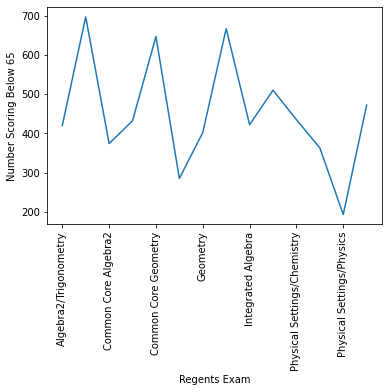

In [ ]:
df.groupby(['Regents Exam'])['Number Scoring Below 65'].max().plot()
plt.xlabel('Regents Exam')
plt.ylabel('Number Scoring Below 65')
plt.xticks(rotation=90)


Comment from me. I seriously can not believe I did this. Yes it was alot of work but I got to practice and learn more. Thank you. 
PS I wasn't sure how to compare Kingsborough Early College School together with an analysis and graphing since it was too much data citywide. This is why I did the comparison seperately. If there is a way I would love to learn that all. Also putting the analysis and graphing side by side. 